In [1]:
#importacoes de pacotes
import pandas as pd #manipulacao de tabelas
import numpy as np #manipulacao cientifica de numeros
import seaborn as sns #visualizaco de graficos avancados
import matplotlib.pyplot as plt #visualizacao basica de dados

from pandas_datareader import DataReader #fonte de dados

from sklearn.model_selection import train_test_split #divisao entre treino e teste
from sklearn.linear_model import LinearRegression #buscando o modelo de regressao linear

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error #metricas para avalisar, mse e mape

In [2]:
#setando periodo de um ano, busca de dados temina hoje e comeca a um ano atras
end = pd.to_datetime('today') #t
start = end - np.timedelta64(1, 'Y')

In [3]:
# setando o dataframe e mostrando as 5 primeiras linhas
df = pd.DataFrame(DataReader('BTC-USD', 'yahoo', start, end)['Close'])
df.head()

,Close
Date,
2020-03-29,5922.042969
2020-03-29,6429.841797
2020-03-30,6438.644531
2020-03-31,6606.776367
2020-04-01,6793.624512


In [6]:
#copiando o primeiro data frame para não haver alteracoes ou erros
df_X_y = df.copy()
#p periodos de delocamento
p = 5
#s é o contador que vai deslocar o periodo de tempo
s = 1

while s <= p:
    df_X_y[f'shift_{s}'] = df_X_y['Close'].shift(s)
    s += 1
    
#eliminando o que ficou vazio apos deslocamentos
df_X_y = df_X_y.dropna()
df_X_y.head()

,Close,shift_1,shift_2,shift_3,shift_4,shift_5
Date,,,,,,
2020-04-02,6733.387207,6793.624512,6606.776367,6438.644531,6429.841797,5922.042969
2020-04-03,6867.527344,6733.387207,6793.624512,6606.776367,6438.644531,6429.841797
2020-04-04,6791.129395,6867.527344,6733.387207,6793.624512,6606.776367,6438.644531
2020-04-05,7271.781250,6791.129395,6867.527344,6733.387207,6793.624512,6606.776367
2020-04-06,7176.414551,7271.781250,6791.129395,6867.527344,6733.387207,6793.624512


In [7]:
#divisao entre dados e alvo
X = df_X_y.drop('Close', axis=1)
y = df_X_y['Close']

In [10]:
#divisao entre treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)

In [11]:
linreg = LinearRegression() #criando modelo
linreg.fit(X_train, y_train) #treinando modelo
y_pred = linreg.predict(X_test) #prevendo com dados de test

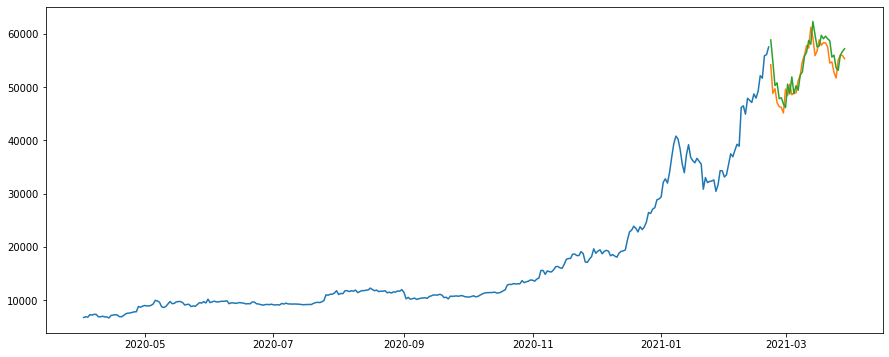

In [23]:
#plotando grafico de treino e teste e previsao
plt.figure(figsize=(15, 6))
plt.plot(y_train, label='treino')
plt.plot(y_test, label='teste')
plt.plot(y_test.index, y_pred, label='previsao')



plt.show()

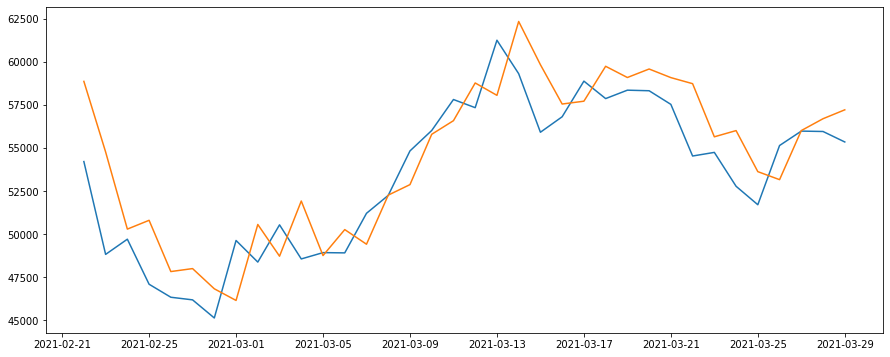

In [25]:
#plotando grafico de treino e teste e previsao
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='teste')
plt.plot(y_test.index, y_pred, label='previsao')



plt.show()

In [26]:
#erro medio quadrado
mean_squared_error(y_test, y_pred)

5788996.814457068

In [28]:
#erro porcento absoluto medio
mean_absolute_percentage_error(y_test, y_pred) * 100

3.7608963961557356